<a href="https://colab.research.google.com/github/Almonfrey/MAI-Course/blob/main/class6_practical_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
# Standard imports for data analysis
import pandas as pd  # Data processing
import numpy as np  # Numerical computing
from sklearn.model_selection import train_test_split

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Matplotlib configuration for inline display (Jupyter only)
%matplotlib inline

Load data

In [2]:
# Load the housing dataset and display the first 5 rows
df = pd.read_csv("data/us_house_sales.csv")
print(df.head())

      Price                              Address         City  Zipcode State  \
0  $554,217    5926 Oak Ave, San Diego, CA 65383    San Diego    65383    CA   
1  $164,454       9583 Oak Ave, Fresno, IL 79339       Fresno    79339    IL   
2       NaN   8224 Oak Ave, Sacramento, TX 87393   Sacramento    87393    TX   
3  $189,267        232 Oak Ave, Fresno, TX 38666       Fresno    38666    TX   
4  $465,778  5446 Pine Rd, Los Angeles, CA 23989  Los Angeles    23989    CA   

  Bedrooms Bathrooms Area (Sqft)   Lot Size  Year Built  Days on Market  \
0    1 bds      3 ba         NaN  4757 sqft      1959.0             101   
1    1 bds      1 ba         NaN  3615 sqft      1969.0              46   
2    6 bds      1 ba   3630 sqft  9369 sqft      1990.0              59   
3    2 bds      1 ba   -605 sqft  8804 sqft      1958.0             119   
4    0 bds      2 ba   1711 sqft  9260 sqft      2020.0              26   

  Property Type   MLS ID               Listing Agent    Status  \
0 

Data formatting

In [3]:
# Display current data types before formatting
print('Data types BEFORE formatting:')
print(df.dtypes)

print(df.head())

# 1. Price - remove $ and commas, convert to float
df['Price'] = pd.to_numeric(
    df['Price'].astype(str).str.replace(r'[\$,]', '', regex=True),
    errors='coerce'
).astype(float)

print(df.head())

# 2. Bedrooms - extract number, allow NaN, use nullable Int type
df['Bedrooms'] = pd.to_numeric(
    df['Bedrooms'].str.extract(r'(-?\d+)')[0],
    errors='coerce'
).astype(int)

# 3. Bathrooms - same as bedrooms
df['Bathrooms'] = pd.to_numeric(
    df['Bathrooms'].str.extract(r'(-?\d+)')[0],
    errors='coerce'
).astype(int)

# 4. Area (Sqft) - remove text and commas, convert to float
df['Area (Sqft)'] = pd.to_numeric(
    df['Area (Sqft)'].str.replace(r'[^\d\.-]', '', regex=True),
    errors='coerce'
).astype(float)

# 5. Lot Size - same as area
df['Lot Size'] = pd.to_numeric(
    df['Lot Size'].str.replace(r'[^\d\.-]', '', regex=True),
    errors='coerce'
).astype(float)

# Verify formatting results
print('\nData types AFTER formatting:')
print(df[['Price', 'Bedrooms', 'Bathrooms', 'Area (Sqft)', 'Lot Size']].dtypes)

Data types BEFORE formatting:
Price              object
Address            object
City               object
Zipcode             int64
State              object
Bedrooms           object
Bathrooms          object
Area (Sqft)        object
Lot Size           object
Year Built        float64
Days on Market      int64
Property Type      object
MLS ID             object
Listing Agent      object
Status             object
Listing URL        object
dtype: object
      Price                              Address         City  Zipcode State  \
0  $554,217    5926 Oak Ave, San Diego, CA 65383    San Diego    65383    CA   
1  $164,454       9583 Oak Ave, Fresno, IL 79339       Fresno    79339    IL   
2       NaN   8224 Oak Ave, Sacramento, TX 87393   Sacramento    87393    TX   
3  $189,267        232 Oak Ave, Fresno, TX 38666       Fresno    38666    TX   
4  $465,778  5446 Pine Rd, Los Angeles, CA 23989  Los Angeles    23989    CA   

  Bedrooms Bathrooms Area (Sqft)   Lot Size  Year Built  Da

Data cleaning

Check for duplicate records

In [4]:
# Check for duplicate records

# Number of duplicate records BEFORE removal
num_duplicates_before = df.duplicated().sum()
print(f'\nNumber of duplicate records BEFORE removal: {num_duplicates_before}')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Number of duplicate records AFTER removal (should be 0)
num_duplicates_after = df.duplicated().sum()
print(f'Number of duplicate records AFTER removal: {num_duplicates_after}')


Number of duplicate records BEFORE removal: 9
Number of duplicate records AFTER removal: 0


Split Dataset

In [5]:
# Splitting data
train_set, temp_set = train_test_split(df, test_size=0.3, random_state=42)
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

print(f"Train set size: {len(train_set)}")
print(f"Validation set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")

Train set size: 2100
Validation set size: 450
Test set size: 450


Missing value treatment

In [6]:
# Missing Value Treatment
print('Missing values BEFORE cleaning:')
print(train_set.isnull().sum())

# Strategy for each column:
median_year = train_set['Year Built'].median()
train_set.fillna({'Lot Size': train_set['Area (Sqft)'], 'Year Built': median_year}, inplace=True)
train_set.dropna(subset=['Price', 'Area (Sqft)', 'Property Type'], inplace=True)

print('Missing values AFTER cleaning:')
print(train_set.isnull().sum())

Missing values BEFORE cleaning:
Price              9
Address            0
City               0
Zipcode            0
State              0
Bedrooms           0
Bathrooms          0
Area (Sqft)       10
Lot Size          14
Year Built        20
Days on Market     0
Property Type     20
MLS ID             0
Listing Agent      0
Status             0
Listing URL        0
dtype: int64
Missing values AFTER cleaning:
Price             0
Address           0
City              0
Zipcode           0
State             0
Bedrooms          0
Bathrooms         0
Area (Sqft)       0
Lot Size          0
Year Built        0
Days on Market    0
Property Type     0
MLS ID            0
Listing Agent     0
Status            0
Listing URL       0
dtype: int64


Removing outliers

In [7]:
# Outlier Detection using the IQR method

# Calculate the first (Q1) and third quartiles (Q3) of the 'Price' column
Q1 = train_set['Price'].quantile(0.25)
Q3 = train_set['Price'].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for detecting outliers
price_lower_bound = Q1 - 1.5 * IQR
price_upper_bound = Q3 + 1.5 * IQR

# Print the calculated bounds for reference
print(f'\nPrice bounds for outlier detection: Lower: {price_lower_bound:,.2f}, Upper: {price_upper_bound:,.2f}')

# Count outliers BEFORE filtering
outliers_before = train_set[(train_set['Price'] < price_lower_bound) | (train_set['Price'] > price_upper_bound)]
num_outliers_before = len(outliers_before)
print(f'Number of outliers detected before filtering: {num_outliers_before}')

# Filter out the outliers
train_set = train_set[(train_set['Price'] >= price_lower_bound) & (train_set['Price'] <= price_upper_bound)]

# Count outliers AFTER filtering (should be zero)
outliers_after = train_set[(train_set['Price'] < price_lower_bound) | (train_set['Price'] > price_upper_bound)]
num_outliers_after = len(outliers_after)
print(f'Number of outliers detected after filtering: {num_outliers_after}')


Price bounds for outlier detection: Lower: -566,601.50, Upper: 2,186,410.50
Number of outliers detected before filtering: 8
Number of outliers detected after filtering: 0


Data validity check

In [8]:
# Data Validity Checks per category

# Number of invalid entries BEFORE filtering
print("Invalid entries BEFORE filtering:")
print(f"Price: {(train_set['Price'] <= 0).sum()} invalid entries")
print(f"Area (Sqft): {(train_set['Area (Sqft)'] <= 0).sum()} invalid entries")
print(f"Bedrooms: {(train_set['Bedrooms'] <= 0).sum()} invalid entries")
print(f"Year Built: {(train_set['Year Built'] <= 1800).sum()} invalid entries")

# Apply all validity conditions to filter the dataframe
train_set = train_set[(train_set['Price'] > 0) &
        (train_set['Area (Sqft)'] > 0) &
        (train_set['Bedrooms'] > 0) &
        (train_set['Year Built'] > 1800)]

# Number of invalid entries AFTER filtering (should be zero)
print("\nInvalid entries AFTER filtering:")
print(f"Price: {(train_set['Price'] <= 0).sum()} invalid entries")
print(f"Area (Sqft): {(train_set['Area (Sqft)'] <= 0).sum()} invalid entries")
print(f"Bedrooms: {(train_set['Bedrooms'] <= 0).sum()} invalid entries")
print(f"Year Built: {(train_set['Year Built'] <= 1800).sum()} invalid entries")

Invalid entries BEFORE filtering:
Price: 3 invalid entries
Area (Sqft): 16 invalid entries
Bedrooms: 7 invalid entries
Year Built: 3 invalid entries

Invalid entries AFTER filtering:
Price: 0 invalid entries
Area (Sqft): 0 invalid entries
Bedrooms: 0 invalid entries
Year Built: 0 invalid entries


Final check

In [9]:
# Final missing value check
print('\nMissing values AFTER cleaning:')
print(train_set.isnull().sum())


Missing values AFTER cleaning:
Price             0
Address           0
City              0
Zipcode           0
State             0
Bedrooms          0
Bathrooms         0
Area (Sqft)       0
Lot Size          0
Year Built        0
Days on Market    0
Property Type     0
MLS ID            0
Listing Agent     0
Status            0
Listing URL       0
dtype: int64


Exploratory Data Analysis (EDA)

Target Variable Exploration

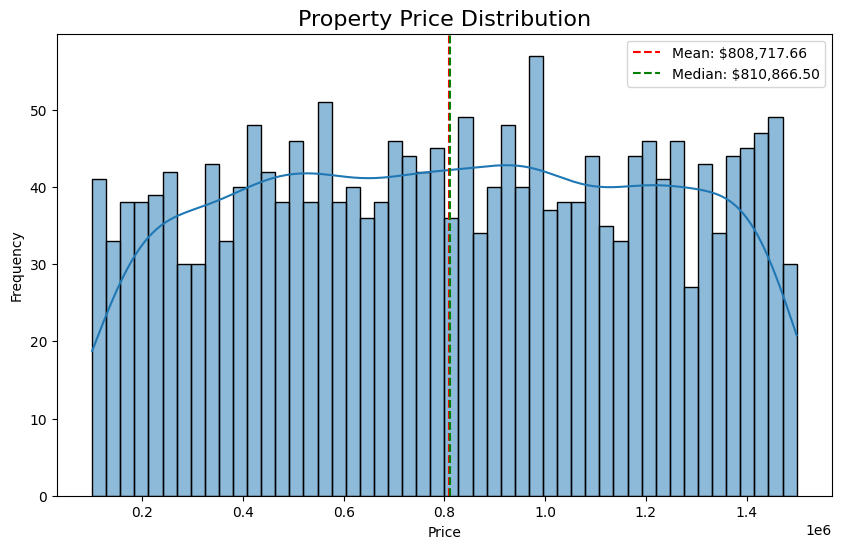

In [10]:
# Basic price distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_set['Price'], bins=50, kde=True)
plt.title('Property Price Distribution', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Frequency')

# Append mean and median to the plot (plt)
mean_price = train_set['Price'].mean()
median_price = train_set['Price'].median()
plt.axvline(mean_price, color='r', linestyle='--', label=f"Mean: ${mean_price:,.2f}")
plt.axvline(median_price, color='g', linestyle='--', label=f"Median: ${median_price:,.2f}")

plt.legend()
plt.show()


Price per Square Foot

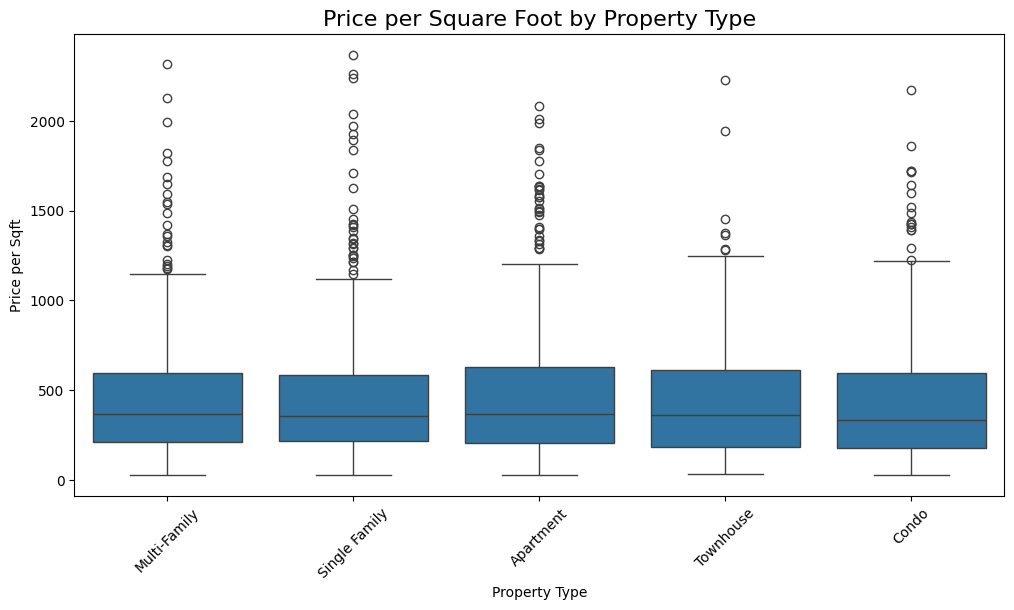

In [11]:
# Calculate price/sqft
train_set['Price_per_Sqft'] = train_set['Price'] / train_set['Area (Sqft)']

# Price/sqft by property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Property Type', y='Price_per_Sqft', data=train_set)
plt.title('Price per Square Foot by Property Type', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Price per Sqft')
plt.show()

Feature Exploration

Geographic Price Patterns

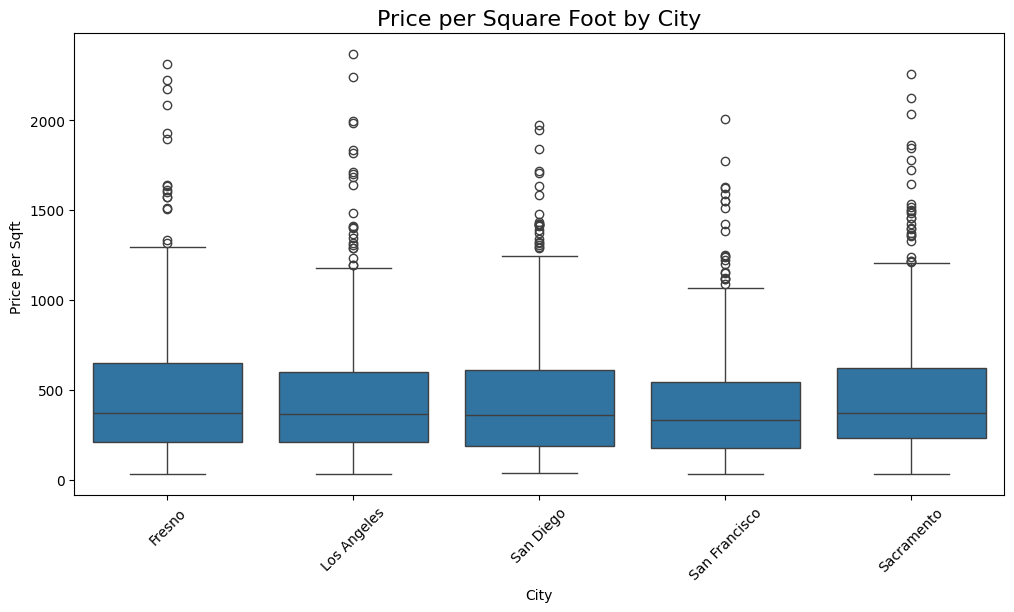

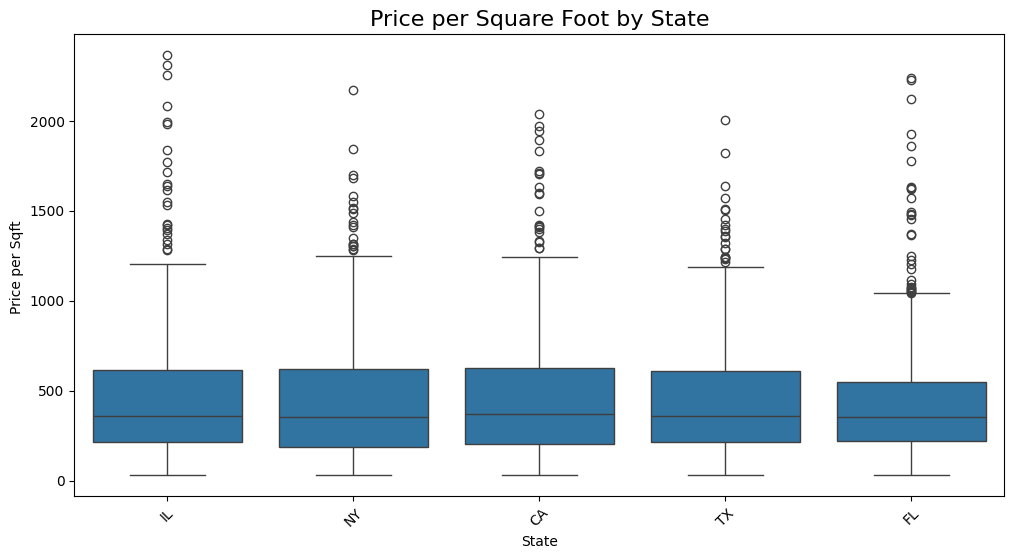

In [12]:
# Price/sqft by city
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price_per_Sqft', data=train_set)
plt.title('Price per Square Foot by City', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Price per Sqft ')
plt.show()

# Price/sqft by state
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Price_per_Sqft', data=train_set)
plt.title('Price per Square Foot by State', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Price per Sqft ')
plt.show()

Impact of Room Count

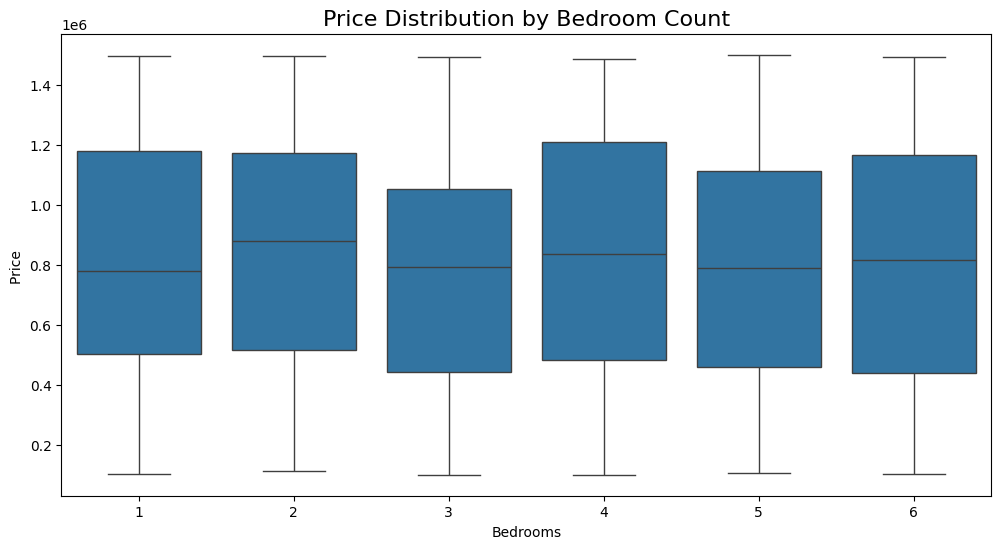

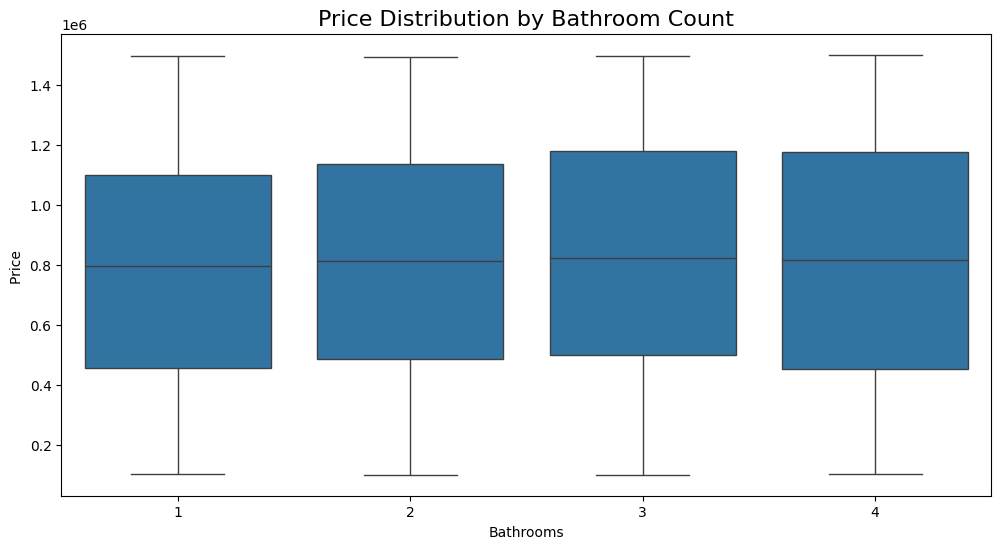

In [13]:
# Price by bedroom count
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bedrooms', y='Price', data=train_set)
plt.title('Price Distribution by Bedroom Count', fontsize=16)
plt.ylabel('Price ')
plt.show()

# Price by bathroom count
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bathrooms', y='Price', data=train_set)
plt.title('Price Distribution by Bathroom Count', fontsize=16)
plt.ylabel('Price ')
plt.show()

Correlation Analysis

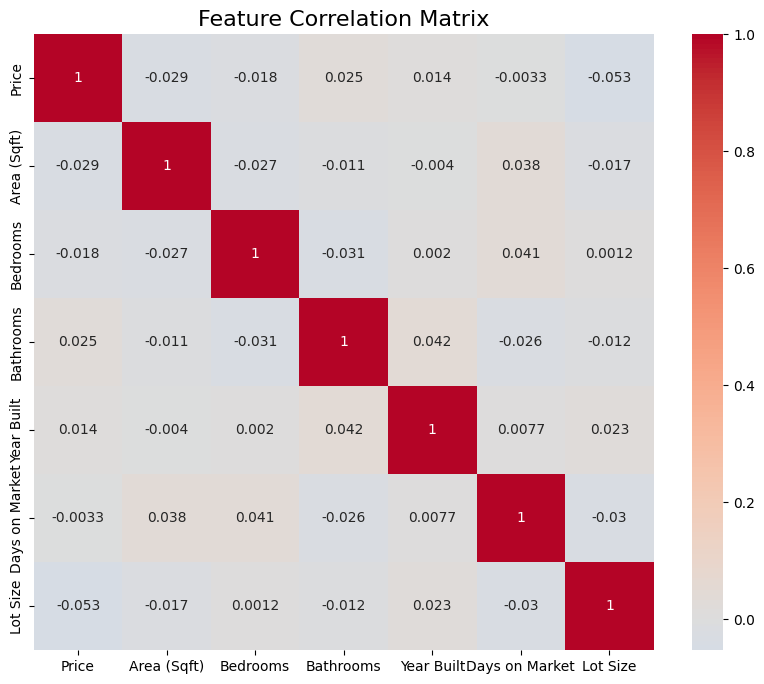

In [14]:
# Correlation heatmap
numerical_cols = ['Price', 'Area (Sqft)', 'Bedrooms', 'Bathrooms', 'Year Built', 'Days on Market', 'Lot Size']
plt.figure(figsize=(10, 8))
sns.heatmap(train_set[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

Feature Engineering

In [15]:
# Feature Engineering
# Bedrooms to rooms ratio
train_set['Bedrooms ratio'] = train_set['Bedrooms'] / (train_set['Bathrooms'] +
                                                       train_set['Bedrooms'])
# Bedrooms to rooms ratio
train_set['Rooms ratio'] = (train_set['Bathrooms'] +
                            train_set['Bedrooms'])  / (train_set['Lot Size'])
# Price correlation
numerical_cols = ['Price', 'Area (Sqft)','Lot Size', 'Bedrooms', 'Bathrooms', 'Year Built', 'Days on Market', 'Bedrooms ratio', 'Rooms ratio']
corr_matrix = train_set[numerical_cols].corr()
corr_matrix["Price"].sort_values(ascending=False)

,Price
Price,1.000000
Rooms ratio,0.048679
Bathrooms,0.025258
Year Built,0.013923
Days on Market,-0.003347
Bedrooms,-0.017851
Area (Sqft),-0.029387
Bedrooms ratio,-0.032536
Lot Size,-0.053199
